In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ujiandata/uas-3-edit.xlsx


In [2]:
# NIM : 17.01.53.0018
# Nama : Bagus kurniawan adhi 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#to print all the interactive output without resorting to print, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_excel("../input/ujiandata/uas-3-edit.xlsx")

print(f"head: \n{data.head(5)}\n")
print(f"Tail: \n {data.tail()} \n")
print(f"Describe data: \n{data.describe()}\n")
print(f"Info: \n{data.info()}\n")

head: 
         Provinsi  2010  2015  2020  2025  2030  2035
0            Aceh  28.1  30.5  33.2  36.2  39.5  43.2
1  Sumatera Utara  49.2  52.6  56.3  60.1  64.1  68.1
2  Sumatera Barat  38.7  44.2  49.6  54.6  59.4  63.8
3            Riau  39.2  39.6  40.1  40.7  41.2  41.8
4           Jambi  30.7  32.0  33.3  34.8  36.5  38.2

Tail: 
         Provinsi  2010  2015  2020  2025  2030  2035
29        Maluku  37.1  38.0  38.9  39.9  41.0  42.1
30  Maluku Utara  27.1  27.8  28.5  29.2  29.9  30.6
31   Papua Barat  29.9  32.3  34.9  37.8  40.9  44.4
32         Papua  26.0  28.4  31.2  34.2  37.7  41.5
33     INDONESIA  49.8  53.3  56.7  60.0  63.4  66.6 

Describe data: 
             2010       2015        2020        2025        2030        2035
count   34.000000   34.00000   34.000000   34.000000   34.000000   34.000000
mean    42.747059   45.45000   48.300000   51.247059   54.320588   57.497059
std     18.187262   18.30031   18.465595   18.622278   18.816527   19.025573
min     19.30000

In [5]:
data_x = data.iloc[:, 1:7]
data_x.head()

,2010,2015,2020,2025,2030,2035
0,28.1,30.5,33.2,36.2,39.5,43.2
1,49.2,52.6,56.3,60.1,64.1,68.1
2,38.7,44.2,49.6,54.6,59.4,63.8
3,39.2,39.6,40.1,40.7,41.2,41.8
4,30.7,32.0,33.3,34.8,36.5,38.2


In [6]:
scr=[]

for i in range (1, 35):
    score = KMeans(n_clusters=i).fit(data_x).score(data_x)
    print(score)
    scr.append(score)

-68292.81970588236
-22256.80227272727
-8354.079163961036
-5176.041306818181
-3499.547284382284
-2567.8971025641017
-1931.184602564102
-1383.1670833333328
-1139.460380952381
-896.8480000000002
-674.3679999999999
-551.3396666666666
-448.6746666666668
-360.85133333333346
-292.2663333333335
-222.40800000000002
-190.778
-162.20466666666658
-133.59966666666665
-113.64966666666662
-92.12833333333332
-72.1783333333333
-53.854999999999954
-46.18999999999998
-38.659999999999975
-31.470000000000002
-24.720000000000002
-18.109999999999996
-11.55
-6.959999999999987
-3.086666666666652
-1.2749999999999824
-0.5549999999999873
-0.0


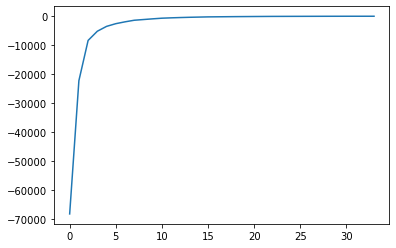

In [7]:
#ambil nilai di tengah2 lekukan untuk nilai cluster disini = 5
plt.plot(scr)

In [8]:
# Proses klastering menggunakan Algoritma Kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_x)

KMeans(n_clusters=5)

In [9]:
# Menambah kolom klastering
data_x["Cluster"] = kmeans.labels_
data_x

,2010,2015,2020,2025,2030,2035,Cluster
0,28.1,30.5,33.2,36.2,39.5,43.2,0
1,49.2,52.6,56.3,60.1,64.1,68.1,3
2,38.7,44.2,49.6,54.6,59.4,63.8,3
3,39.2,39.6,40.1,40.7,41.2,41.8,0
4,30.7,32.0,33.3,34.8,36.5,38.2,0
5,35.8,36.5,37.3,38.2,39.1,40.1,0
6,31.0,31.7,32.6,33.5,34.5,35.6,0
7,25.7,28.3,31.3,34.6,38.3,42.4,0
8,49.2,52.5,56.0,59.7,63.5,67.4,3
9,82.8,83.0,83.3,83.8,84.5,85.3,1


(array([13.,  0.,  6.,  0.,  0.,  1.,  0., 11.,  0.,  3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

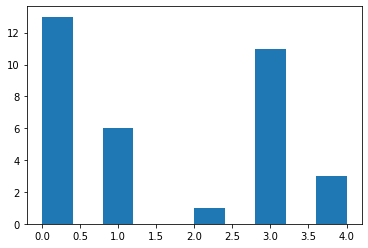

In [10]:
# Visualisasi pembagian hasil klastering
plt.hist(data_x["Cluster"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

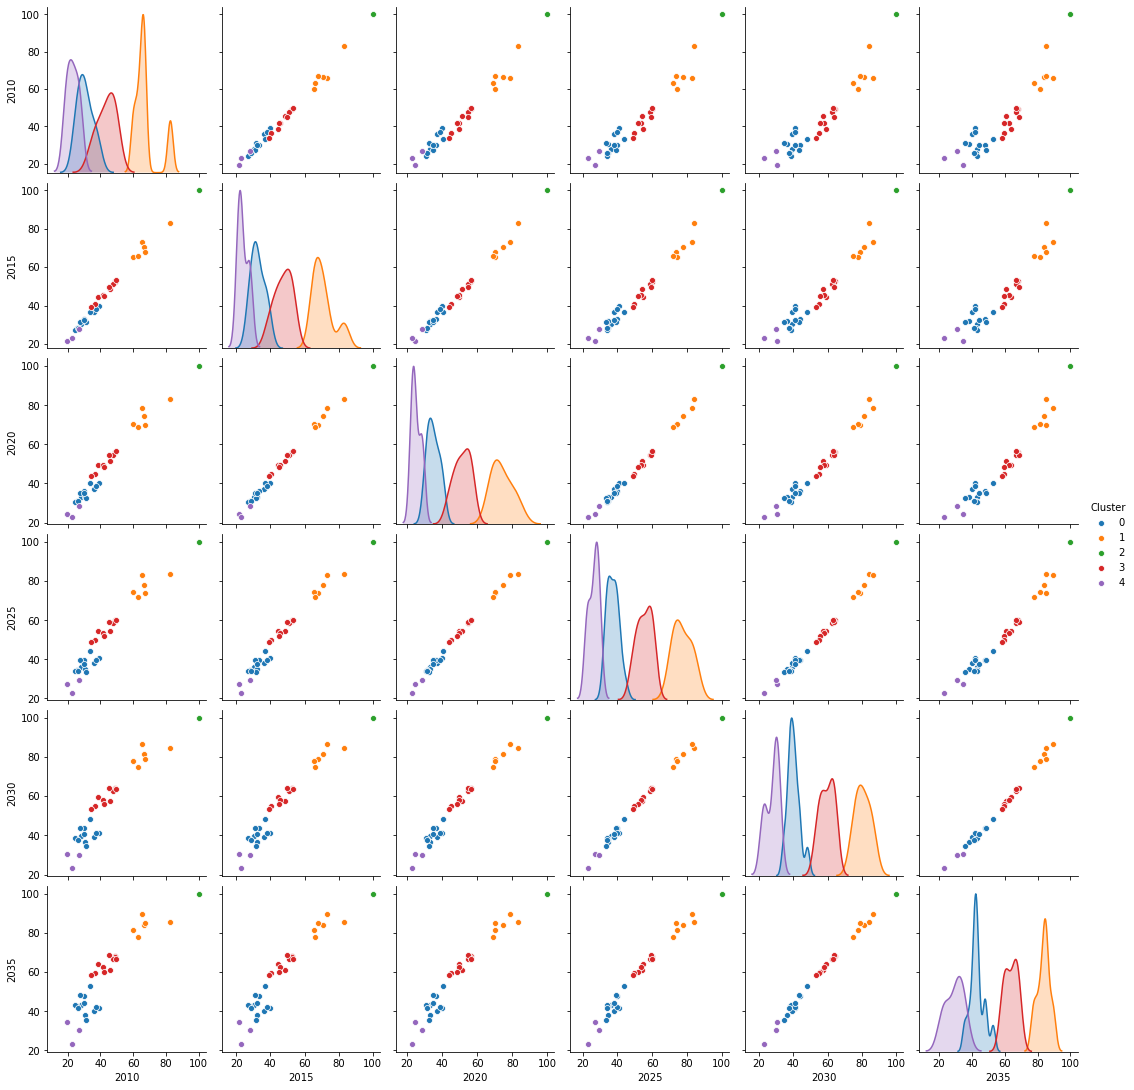

In [11]:
#visualisasi pengelompokan cluster dengan seaborn
sns.pairplot(data_x, hue="Cluster")